STEP 1: IMPORTING LIBRARIES AND ITS DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Step 2: DATA PRE-PROCESSING

In [2]:
#Get the location of the datasets
directory = os.getcwd()
print(directory)
loc = directory + '\Datasets'
print(os.listdir(loc))

C:\Users\rjtdu\OneDrive\Desktop\Fuse Deeplearning\Project\Code Here
['.ipynb_checkpoints', 'mergeData.csv', 'Preprocessing.ipynb', 'test.csv', 'train.csv']


In [3]:
#Reading all the datasets as dataframes
df1 = pd.read_csv(loc + '\\mergeData.csv')
df2 = pd.read_csv(loc + '\\test.csv')
df3 = pd.read_csv(loc + '\\train.csv')

In [4]:
#Getting the column names of each dataframes
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Data ', 'Label'], dtype='object')
Index(['text', 'label'], dtype='object')
Index(['text', 'label'], dtype='object')


In [5]:
#Changing the column names to identical column names
new_columns = {'text': 'Data ', 'label' : 'Label'}
print(type(new_columns))
df2.rename(columns = new_columns, inplace = True)
df3.rename(columns = new_columns, inplace = True)

<class 'dict'>


In [6]:
#Getting the column names of each dataframes
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Data ', 'Label'], dtype='object')
Index(['Data ', 'Label'], dtype='object')
Index(['Data ', 'Label'], dtype='object')


In [7]:
#Checking the size of each dataframe and concacting
print(df1.shape)
print(df2.shape)
print(df3.shape)
df = pd.concat([df1,df2,df3], ignore_index = True, axis = 0)
df

(3084, 2)
(1996, 2)
(6000, 2)


,Data,Label
0,यो समान राम्रो रहेछ,1
1,समान राम्रो रहेछ,1
2,राम्रो रहेछ,1
3,NaN,NaN
4,यो घडी मलाइ साँच्चिकै सुहाउछ । म यसलाई खरीद गर...,1
...,...,...
11075,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
11076,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
11077,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
11078,बधाई र सुभकामना ।।,1


In [8]:
#Removing all the missing values (NaN)
df.dropna(axis = 0, inplace = True)
df

,Data,Label
0,यो समान राम्रो रहेछ,1
1,समान राम्रो रहेछ,1
2,राम्रो रहेछ,1
4,यो घडी मलाइ साँच्चिकै सुहाउछ । म यसलाई खरीद गर...,1
5,साँच्चिकै सुहाउछ,1
...,...,...
11075,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
11076,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
11077,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
11078,बधाई र सुभकामना ।।,1


In [10]:
#Visualizing the labels of the data which can be either 0 = negative, 1 = positive or 2 = Neutral
df['Label'].value_counts()

1     3963
0     3697
2     2499
-        6
o        2
0        1
20       1
11       1
--       1
Name: Label, dtype: int64

Note: There are some outlier values which must be removed in the preprocessing


In [11]:
#Checking if the label value lies in ['0', '1', '2'] or not. If yes returns True for that data object else returns false.
mask = df['Label'].isin(['0', '1', '2'])

In [12]:
mask

0        True
1        True
2        True
4        True
5        True
         ... 
11075    True
11076    True
11077    True
11078    True
11079    True
Name: Label, Length: 10171, dtype: bool

In [13]:
df_filtered = df[mask]
df_filtered

,Data,Label
0,यो समान राम्रो रहेछ,1
1,समान राम्रो रहेछ,1
2,राम्रो रहेछ,1
4,यो घडी मलाइ साँच्चिकै सुहाउछ । म यसलाई खरीद गर...,1
5,साँच्चिकै सुहाउछ,1
...,...,...
11075,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
11076,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
11077,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
11078,बधाई र सुभकामना ।।,1


Note: As you can see some data objects got removed since size reduced fromm 10171 to 10159

In [14]:
#Rearranging the index of the data frame
df = df_filtered
df.reset_index(drop = True, inplace = True)
df

,Data,Label
0,यो समान राम्रो रहेछ,1
1,समान राम्रो रहेछ,1
2,राम्रो रहेछ,1
3,यो घडी मलाइ साँच्चिकै सुहाउछ । म यसलाई खरीद गर...,1
4,साँच्चिकै सुहाउछ,1
...,...,...
10154,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
10155,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
10156,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
10157,बधाई र सुभकामना ।।,1


In [21]:
#Visualizing the Input Data After Preprocessing - Bar Plot
data = df['Label'].value_counts()
print(data)

1    3963
0    3697
2    2499
Name: Label, dtype: int64


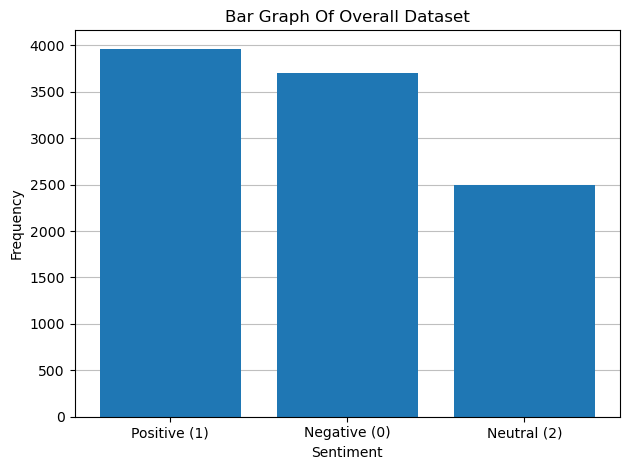

In [41]:
values = data.index
frequency = data.values

plt.bar(values,frequency)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Bar Graph Of Overall Dataset')
plt.grid(axis='y', which='major', color='gray', alpha=0.5)
plt.gca().set_axisbelow(True)  # Ensure that grid lines are plotted below the bars

plt.xticks(ticks = ['1', '0', '2'], labels = ['Positive (1)', 'Negative (0)', 'Neutral (2)'])
plt.tight_layout()
plt.show()